In [1]:
import torch
import numpy as np
import pandas as pd
import sys
#import torch.nn as nn
sys.path += ["../src"]
from scipy.special import expit as sigmoid
from scipy.special import logit
import simulator_BC_coo as sim_coo
import estimation_with_edges_and_evidences as ewee
from simulator_BC_coo import opinion_update
#from initialize_model import EarlyStopping,RandomizeEpsilon,choose_optimizer
from importlib import reload
from time import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
N, T, edge_per_t, evidences_per_t = 100, 100, 8, 10
rho = 70
epsilon, mu = 0.23, 0.18

In [4]:
X, edges, evidences = sim_coo.simulator_BC_np_coo(N, T, edge_per_t, epsilon, mu, 
                                                  with_evidences = True, distribution_evidences = 'bernoulli',
                                                  evidences_per_t = evidences_per_t)

In [5]:
(time_sim, history) = ewee.estimation_epsilon_torch(X, edges, evidences, mu, epsilon_0 = 0.25, rho = 70,
                                                    num_epochs = 400, optimizer_name = "adam", 
                                                    lr = 0.05, hide_progress = False, verbose = False,
                                                    min_delta = 1e-5, patience = 5, return_time = False, min_epochs = 20)


  8%|████████                                                                                          | 33/400 [00:19<03:31,  1.74it/s]

KeyboardInterrupt



In [24]:
time_sim

1529.4369759559631

In [25]:
len(history["epsilon"])

400

In [26]:
X0_sim, epsilon_sim = history["X0"][-1], history["epsilon"][-1]

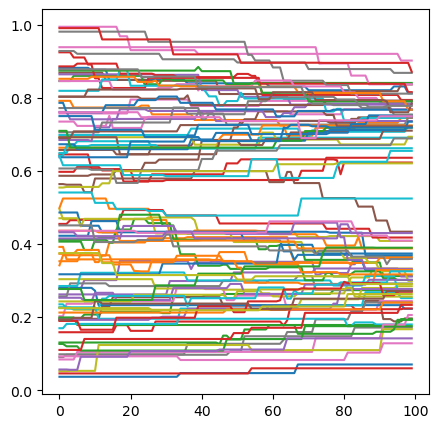

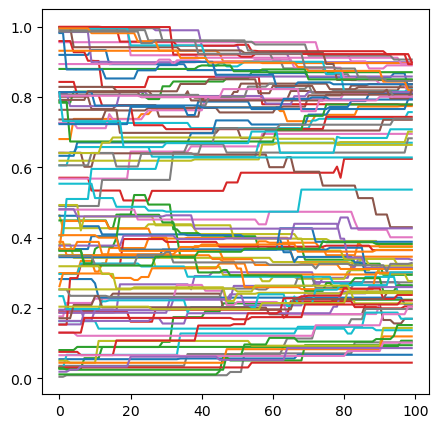

In [27]:
sim_coo.print_opinion_trajectory(X)
sim_coo.print_opinion_trajectory(ewee.X_from_X0(X0_sim, mu, edges, T, edge_per_t, N).detach())

<AxesSubplot:>

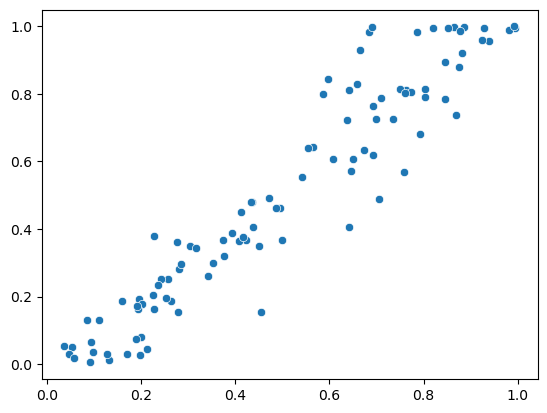

In [28]:
fig, axes = plt.subplots()

sns.scatterplot(x = X[0], y = X0_sim)

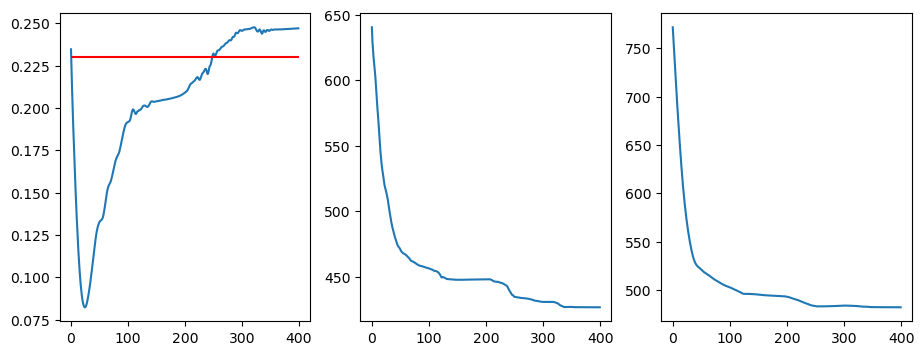

In [31]:
fig, axes = plt.subplots(ncols = 3, nrows = 1, figsize = (11, 4))

axes[0].plot(history["epsilon"])
axes[0].hlines(y = epsilon, xmin = 0, xmax = len(history["loss"]), color = "red")
axes[1].plot(history["loss edges"])
axes[2].plot(history["loss evidences"])

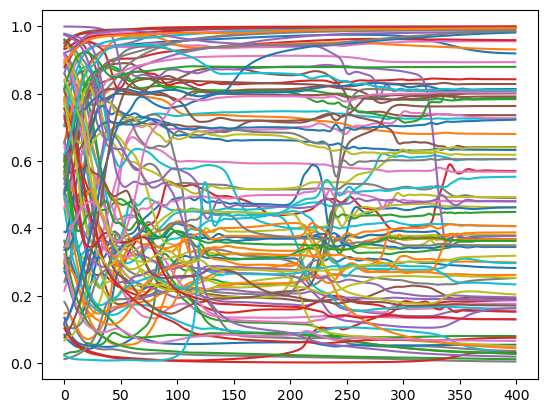

In [30]:
fig, axes = plt.subplots()

axes.plot(torch.cat([t[:, None] for t in history["X0"]], dim = 1).T.detach())

fig.show()

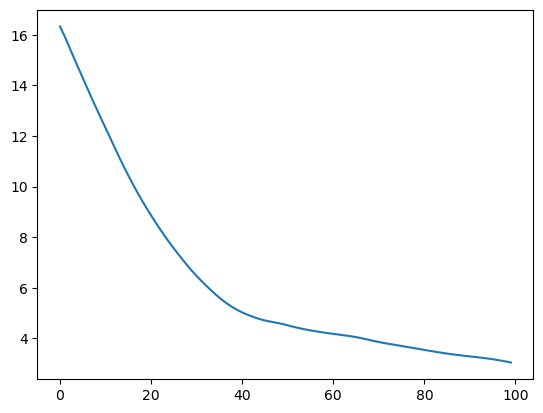

In [35]:
plt.plot([((history["X0"][k] - X[0])**2).sum() for k in range(T)])

In [37]:
import cProfile

In [40]:
cProfile.run("ewee.estimation_epsilon_torch(X, edges, evidences, mu, num_epochs = 1,lr = 0.05, hide_progress = True, verbose = False,min_delta = 1e-5, patience = 5, return_time = False, min_epochs = 20)")

         3965 function calls (3955 primitive calls) in 0.611 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(repeat)
        1    0.003    0.003    0.611    0.611 <string>:1(<module>)
        2    0.000    0.000    0.447    0.224 __init__.py:103(backward)
      198    0.000    0.000    0.008    0.000 __init__.py:153(sum)
        2    0.000    0.000    0.000    0.000 __init__.py:47(_make_grads)
        2    0.000    0.000    0.000    0.000 __init__.py:78(_is_compiled)
        2    0.000    0.000    0.000    0.000 __init__.py:82(is_available)
        2    0.000    0.000    0.000    0.000 __init__.py:95(_tensor_or_tensors_to_tuple)
        1    0.000    0.000    0.000    0.000 _monitor.py:94(report)
        8    0.000    0.000    0.000    0.000 _ops.py:437(__call__)
        4    0.000    0.000    0.000    0.000 _tensor.py:33(wrapped)
        2    